# Set Intersection Projection - Julia software for computing projections onto intersections of constraint sets
Bas Peters (Emory University), Felix J. Herrmann (Georgia Institute of Technology)

## [Preprint paper](https://arxiv.org/abs/1902.09699) --  [Code on github](https://github.com/slimgroup/SetIntersectionProjection.jl)

**SetIntersectionProjection** is a **Julia** package developed by Bas Peters and Felix J. Herrmann that computes projections of vectorized 2D and 3D images/models ($m \in \mathbb{R}^N$) onto intersections of $p$ convex and non-convex sets:

\begin{equation}
\mathcal{P}_{\mathcal{V}} (m) \in \arg\min_{x} \frac{1}{2} \| x - m \|_2^2 \quad \text{subject to} \quad x \in\bigcap_{i=1}^p \mathcal{V}_i.
\end{equation}
Our main algorithm, **Projection Adaptive Relaxed Simultaneous Direction Method of Multipliers (PARSDMM)**, recasts the projection problem as

\begin{equation}
\min_{x} \frac{1}{2} \| x - m \|_2^2 + \sum_{i=1}^{p} \iota_{\mathcal{C}_i}(A_i x).
\end{equation}

Each set $\mathcal{V_i}$ is characterized as an 'elementary' set $\mathcal{C_i}$, for which we know a closed-form projection ($\ell_1$-ball, $\ell_2$-ball, bounds, nuclear norm, rank, cardinality, annulus, ...) and a linear operator $A_i$ (discrete derivatives, DFT, DCT, Curvelet transform, anisotropic total-variation,...). For example, if we have $\mathcal{V} = \{ x \: | \: \| Ax \|_1 \leq \sigma \}$, then we use a linear operator $A$ and set $\mathcal{C} = \{ y \: | \: \| y \|_1 \leq \sigma \}$ with additional equality constraints $Ax=y$.

The inputs for the algorithm are pairs of projectors onto $\mathcal{C}_i$ and linear operators $A_i$. 

 **SetIntersectionProjection** is designed
 
- for applications in imaging inverse problems.
- as a plug-in projector for other algorithms that solve $\min_{m} f(m)  \:\: \text{subject to} \:\: m \in \bigcap_{i=1}^p \mathcal{V}_i$, e.g., a (spectral) projected gradient / projected quasi-Newton / projected-Newton method. 
- as a solver for linear inverse problem with forward operator $F \in \mathbb{R}^{M \times N}$, data constraints such as $\mathcal{C}^\text{data} = \{ x \: | \: \| Fx - d_\text{observed} \|_2 \leq \sigma \}$, and model property constraints formulated as
	\begin{equation}
	\min_{x,y_i} \frac{1}{2}\| x - m \|_2^2 + \sum_{i=1}^{p} \iota_{\mathcal{C}_i}(y_i) + \iota_{\mathcal{C}_{p+1}^\text{data}}(y_{p+1})\quad \text{s.t.} \quad \begin{cases}
	A_i x = y_i \\ Fx=y_{p+1}
	\end{cases}.
	\end{equation}
	
**SetIntersectionProjection** also forms the basis for, and now includes, software to compute projections onto generalized Minkowski sets [documentation](https://petersbas.github.io/GeneralizedMinkowskiSetDocs/).


## Computational features

- parametric typing for Float32 and Float64 support
- designed for model sizes from $\approx 50^2$ to at least  $400^3$
- includes scripts to set up projectors and linear operators For 2D and 3D models
- constraints may be defined for the matrix/tensor model and for columns/slices/fibers simultaneously
- works in serial or parallel with 1 Julia worker per constraint
- some constraints also use Julia Threads to compute sub-problems in parallel on each worker
- serial part of code also uses multithreading and mulithreaded BLAS & FFTW operations
- a build-in multilevel continuations drastically reduces computational times for many problems
- a build-in multilevel continuations empirically lead to better results for non-convex sets
- linear operators may be: SparseMatrixCSC or [JOLI](https://github.com/slimgroup/JOLI.jl) DCT/DFT/Curvelet matrix-free operators
- stores `AtA[i]=` $A_i^\top A_i$ in compressed diagonal storage (CDS or DIA format) if all $A_i$ have a banded structure. This saves memory compared to standard Julia `SparseMatrixCSC` format. We also use a multithreaded matrix-vector product which is faster than the Julia `SparseMatrixCSC` matrix-vector product

## Applications

 - [Seismic full-waveform inversion with SetIntersectionProjection as the projector for spectral projected gradient](docs/README_freq_FWI_ex.html)
 - [Learning a parametric intersection of (non-)convex sets for to joint image denoising-deblurring-inpainting or image desaturation](docs/README_image_proc_constraint_learning.html)

## Examples of parallel and multilevel functionality
 - [Tutorial](docs/README_Tutorial.html)
  
## Performance

 - [timings for projections of 2D and 3D models vs grid size and computational cost of parallel Dykstra vs PARSDMM](docs/README_PARSDMM_performance.html)
 - [timings Julia SparseMatrixCSC mat-vec vs our multi-threaded compressed-diagonal mat-vec](docs/MVPs.html)
 
## List of constraints & linear operators

Overview of constraint sets that the software currently supports. A new constraint set may be added by providing a projection onto the set (without linear operator) and a sparse linear operator or equivalent matrix-vector product together with its adjoint.


|  descriptions | mathematical form of the constrain set construction |
|-------- |-------- | 
| $\{ m \: \mid \: l \leq m \leq u \}$   | bounds |
| transform-domain bounds | $\{ m \: \mid \: l \leq (A m)[i] \leq u \}$ |
| transform-domain $\ell_1$ | $\{ m \: \mid \: \| A m \|_1 \leq \sigma \}$ |
| transform-domain $\ell_2$ | $\{ m \: \mid \: \| A m \|_2 \leq \sigma \}$ |
| transform-domain annulus | $\{ m \: \mid \: \sigma_l \leq \| A m \|_2 \leq \sigma_u \}$ |
| transform-domain cardinality | $\{ m \: \mid \: \text{card}(Am) \leq k \}$, $k$ is a positive integer |
| transform-domain nuclear norm | $\{ m \: \mid \: \sum_{j=1}^k \lambda[j] \leq \sigma \}$, with $Am = \operatorname{vec}( \sum_{j=1}^{k}\lambda[j] u_j v_j^\top )$ is the SVD |
| transform-domain rank constraint | $\{ m \: \mid \:  Am = \operatorname{vec}( \sum_{j=1}^{r}\lambda[j] u_j v_j^\top) \}$, $r < \text{min}(n_z,n_x)$ |
| subspace constraints | $\{ m \: \mid m = A c, \:\: c \in \mathbb{C}^M \}$ |


Overview of the linear operators that we currently set up. Software can work with any linear operator as long it is one of the types `SparseMatrixCSC` or `JOLI` operator. Possible conversion to CDS format happens in the software. Operator math is shown for the 2D case. Curvelets require the separate installation of the [CurveLab](http://curvelet.org/software.html) software.

|  descriptions | Linear operator | code
|--- |--- | --- |
|discrete derivative in one direction | $D_z \otimes I_x$ , $I_z \otimes D_x$ | "D_z", "D_x", "D_y" |
|discrete derivative in all directions | $\begin{pmatrix} D_z \otimes I_x \\ I_z \otimes D_x \end{pmatrix}$ | "D2D" or "D3D" | 
| identity matrix | $I$ | "identity" |
| discrete cosine transform | | "DCT" |
| discrete Fourier transform | | "DFT" |
| curvelet transform | | "curvelet" |
| wavelet transform | | "wavelet" |

# A first example
The following example illustrates the basic usage. We will project an image onto a set that is the intersection of bound constraint, vertical monotonicity (slope-constraints) and horizontal smoothness (another type of slope-constraint). This is a serial (single-level) example. Use parallel and or multi-level version for larger problems. An extended tutorial can be found [here](docs/README_Tutorial.html)

In [12]:
using Distributed
@everywhere using SetIntersectionProjection
using MAT
using LinearAlgebra

mutable struct compgrid
  d :: Tuple
  n :: Tuple
end

#PARSDMM options:
options    = PARSDMM_options()
options.FL = Float32

#select working precision
if options.FL==Float64
  TF = Float64
elseif options.FL==Float32
  TF = Float32
end

#load image to project
file = matopen(joinpath(dirname(pathof(SetIntersectionProjection)), "../examples/Data/compass_velocity.mat"))
m    = read(file, "Data");close(file)
m    = m[1:341,200:600]
m    = permutedims(m,[2,1])

#set up computational grid (25 and 6 m are the original distances between grid points)
comp_grid = compgrid((TF(25.0), TF(6.0)),(size(m,1), size(m,2)))
m         = convert(Vector{TF},vec(m));

Now we are ready to decide what constraints we want to use. We select bounds constraints (bounds may be scalar or vector valued) as well as bound constraints on the vertical (z-direction) discrete derivative of the image. This also known as a slope constraint and we use it to achieve monotonicity of the pixel values from top to bottom.

We provide scripts to generate projectors and linear operators, but you can build your own as well.

In [13]:
#constraints
constraint = Vector{SetIntersectionProjection.set_definitions}() #Initialize constraint information

#bounds:
m_min     = 1500.0
m_max     = 4500.0
set_type  = "bounds"
TD_OP     = "identity"
app_mode  = ("matrix","")
custom_TD_OP = ([],false)
push!(constraint, set_definitions(set_type,TD_OP,m_min,m_max,app_mode,custom_TD_OP))


#slope constraints (vertical)
m_min     = 0.0
m_max     = 1e6
set_type  = "bounds"
TD_OP     = "D_z"
app_mode  = ("matrix","")
custom_TD_OP = ([],false)
push!(constraint, set_definitions(set_type,TD_OP,m_min,m_max,app_mode,custom_TD_OP))


options.parallel       = false
(P_sub,TD_OP,set_Prop) = setup_constraints(constraint,comp_grid,options.FL);

Once we have projectors and transform-domain operators, we use `PARSDMM_precompute_distribute` to precompute and distribute things, followed by actually projecting `m` and plotting the results.

In [14]:
(TD_OP,AtA,l,y) = PARSDMM_precompute_distribute(TD_OP,set_Prop,comp_grid,options)
@time (x,log_PARSDMM) = PARSDMM(m,AtA,TD_OP,set_Prop,P_sub,comp_grid,options);
@time (x,log_PARSDMM) = PARSDMM(m,AtA,TD_OP,set_Prop,P_sub,comp_grid,options);

relative evolution to small, exiting PARSDMM (iteration 34)
  2.725928 seconds (26.28 k allocations: 623.762 MiB, 25.95% gc time)
relative evolution to small, exiting PARSDMM (iteration 34)
  2.026802 seconds (26.39 k allocations: 623.772 MiB, 5.29% gc time)


Let's plot the results (this example uses PyPlot)

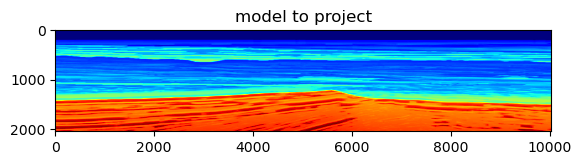

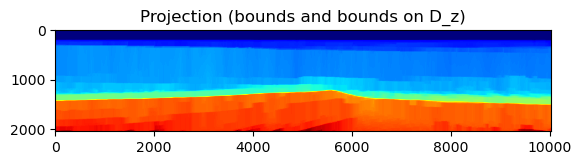

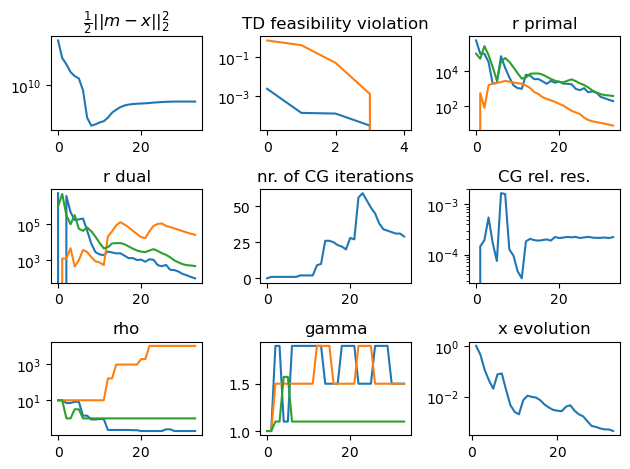

In [15]:
#define axis limits and colorbar limits for plotting
xmax = comp_grid.d[1]*comp_grid.n[1]
zmax = comp_grid.d[2]*comp_grid.n[2]
vmi  = 1500.0
vma  = 4500.0

using PyPlot

figure();imshow(permutedims(reshape(m,(comp_grid.n[1],comp_grid.n[2])),[2,1]),cmap="jet",vmin=vmi,vmax=vma,extent=[0,  xmax, zmax, 0]); title("model to project")
figure();imshow(permutedims(reshape(x,(comp_grid.n[1],comp_grid.n[2])),[2,1]),cmap="jet",vmin=vmi,vmax=vma,extent=[0,  xmax, zmax, 0]); title("Projection (bounds and bounds on D_z)")


#plot PARSDMM logs
figure();
subplot(3, 3, 3);semilogy(log_PARSDMM.r_pri)          ;title("r primal")
subplot(3, 3, 4);semilogy(log_PARSDMM.r_dual)         ;title("r dual")
subplot(3, 3, 1);semilogy(log_PARSDMM.obj)            ;title(L"$ \frac{1}{2} || m-x ||_2^2 $")
subplot(3, 3, 2);semilogy(log_PARSDMM.set_feasibility);title("TD feasibility violation")
subplot(3, 3, 5);plot(log_PARSDMM.cg_it)              ;title("nr. of CG iterations")
subplot(3, 3, 6);semilogy(log_PARSDMM.cg_relres)      ;title("CG rel. res.")
subplot(3, 3, 7);semilogy(log_PARSDMM.rho)            ;title("rho")
subplot(3, 3, 8);plot(log_PARSDMM.gamma)              ;title("gamma")
subplot(3, 3, 9);semilogy(log_PARSDMM.evol_x)         ;title("x evolution")
tight_layout()